**Lecturer**

Set up MATLAB

In [2]:
cd matlab
pwd
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact

Error using cd
Cannot CD to /Users/eechris/code/src/github.com/cpjobling/eglm03-textbook/03/4/matlab/matlab (Name is nonexistent or not a directory).


# Cascade Lead compensation

## Introduction

The proportional plus derivative compensator has the unfortunate property that its high frequency gain is infinite. This means that high frequency effects, such as sensor noise and un-modelled high-frequency dynamics, e.g. resonance terms, will be amplified with potentially disastrous effects. Of course, a real physical derivative operator cannot be implemented and any implementation will actually have poles that will limit the high-frequency gain.

Recognizing this, an alternative to the pure P+D

$$D_{\mathrm{P+D}}=K_D s + K_{\mathrm{prop}}$$

is the so-called "lead compensator"

$$D_{\rm{lead}}(s) = {K_c}\left( \frac{s - z_0}{s - p_0}\right)$$

where  

$$|p_0| > |z_0|.$$

Considering the frequency response of $D_{\mathrm{lead}}$  

$$D_{\mathrm{lead}}(j\omega)
=  K_c\left(\frac{j\omega-z_0}{j\omega-p_0}\right)$$

The low and high-frequency gains are:

$$\left.D_{\mathrm{lead}}(j\omega)\right|_{\omega\to 0} = Kc \left(\frac{z_0}{p_0}\right)$$

$$\left.D_{\mathrm{lead}}(j\omega)\right|_{\omega\to \infty} = Kc$$

so that the ratio of high-to-low frequency gain is 

$$\frac{D_{\mathrm{lead}}(j\infty)}{D_{\mathrm{lead}}(j0)}=\frac{p_0}{z_0}>0$$

The lead compensator is still a high-pass filter but the pole at $s=p_0$
limits the high frequency gain. Typically, the ratio of $p_0$ to $z_0$ is kept
to below 10.

## Properties of the Cascade Lead Compensator

As  $|p_0| > |z_0|$, the angle contributed by the compensator to some arbitrary
point $s_1$ at on the _s_-plane is illustrated in Figure 1.

![Figure 1](images/fig1.png)

**Figure 1 Angle contribution of a lead compensator**

The net contribution is

$$\phi_c = \theta_z - \theta_p > 0$$

so that the lead compensator always makes a positive contribution to the
angle criterion. 

This has the effect of allowing the closed-loop poles to move
to the left in the s-plane. 

The problem is then how to choose the relative location of the pole and the zero. 

We reproduce the advice of D'Azzo and Houpis (1975).

## Method 1

Use the zero to cancel a low frequency real pole. This can simplify the root locus and reduce the complexity of the problem. The compensator pole is then placed such that $s_1$ becomes a point on the desired root-locus. 

For a Type 1 system, the real pole (excluding the pole at zero) that is closest to the origin should be cancelled. 

For a Type 0 system, the second closest pole to the origin should be cancelled.

### Example 1

The following Matlab code illustrates these principles for the system with

Type 1 open-loop transfer function

$$G_1(s) = \frac{1}{s(s + 1)}$$

Define the plant

In [ ]:
G1 = tf(1,conv([1, 0],[1, 1])); H=1;

Plot root-locus

In [ ]:
rlocus(G1*H)

Clearly, we cannot achieve a closed-loop pole at $s_1 = -2 + j2$ without some dynamic compensation. 

However, if we use the zero of a cascade lead compensator to cancel the pole at $s = -1$ and place the pole at $s = -4$ we get:

In [ ]:
D1 = zpk([-1],[-4],1);
Go1 = D1*G1*H;

In [ ]:
rlocus(Go1)

which will have a closed-loop pole at the desired location when the gain is

In [ ]:
Kc = rlocfind(Go1,-2+2j)

### Example 2

For a Type 0 system

$$G_2(s) = \frac{1}{(s + 1)(s + 2)}$$

the zero should be used to cancel the pole at $s=-2$. We leave it as an
exercise to prove that the compensator

$$D_2(s)=5\left(\frac{s+2}{s+3}\right)$$

gives the desired closed-loop poles.

*Note*

You should be aware that the lead compensator zero will still appear in the closed-loop transfer function, and you should verify that the closed-loop step response is acceptible.

## Method 2

The following graphical method maximizes the ratio between pole and zero for
any given angle contribution. This minimizes the additional compensator gain
needed to satisfy the gain criterion. 







![Figure 2 Graphical construction for locating the pole and zero of a lead compensator](images/fig2.png)
*Figure 2 Graphical construction for locating the pole and zero of a lead compensator.*

The steps in the location of the lead-compensator pole and zero are as follows (refer to Figure 2).

* Locate the desired closed-loop pole $s_1$. Draw a line from the origin to
$s_1$ and a horizontal line through $s_1$ to the left.

* Bisect the angle between the two lines drawn in step 1.

* Measure the angle $\phi_c$ either side of the line drawn in step 2.

* The intersections of these lines with the real axis locate the compensator
pole $p_0$ and zero $z_0$.

### Example 3

We return to the satellite attitude control problem with

$$G(s) = \frac{1}{s^2}$$

Requiring a closed-loop pole $S_1 = -2 + j2$, the geometry of the problem is illustrated in Figure 3.

![Figure 3 Lead compensator design for the satellite attitude control problem](images/fig3.png)
*Figure 3 Lead compensator design for the satellite attitude control problem.*

Note that the line drawn from the origin to the point s1 subtends an angle
of $135^\circ$ to the positive real axis.

We can use MATLAB to help to work through the trigonometry. The angle contribution
of the plant and feedback at $s_1$ is obtained as follows.

In [4]:
G = tf(1,[1,0,0]);
H = 1;
GH = G*H;
s1 = -2+2j;

The total contribution of the plant poles and zeros can be calculated
directly using the Matlab equivalent of the angle criterion

In [5]:
[zeros,poles,gain]=zpkdata(GH,'v');

contribution in degrees

In [6]:
contrib = (180/pi)*(sum(angle(s1 - zeros)) - sum(angle(s1 - poles)))

contrib =
  -270


The root locus angle criterion gives lead contribution

$$\begin{array}{c}\angle G({s_1})H({s_1}) + {\phi _c} =  - {180^ \circ
}\\{\phi _c} =  - {180^ \circ } - \angle G({s_1})H({s_1})\end{array}$$

In [7]:
phi_c = -180 - contrib

phi_c =
    90


In [8]:
half_phi_c = phi_c/2

half_phi_c =
    45


Because the line BA and OD are parallel, the angle subtended by the line OAB is also $135^\circ$. Thus

In [9]:
angle_OAB = 135;
angle_BAD = angle_OAB/2 - half_phi_c;
angle_BEO = angle_OAB/2 + half_phi_c;

and by parallel line theory

In [10]:
theta_p = angle_BAD

theta_p =
   22.5000


In [11]:
theta_z = angle_BEO

theta_z =
  112.5000


The pole and zero locations are given by

In [12]:
p0 = -2-2/tan(theta_p*pi/180)

p0 =
   -6.8284


In [13]:
z0 = -2-2/tan(theta_z*pi/180)

z0 =
   -1.1716


The compensator gain is obtained using the gain criterion. With MATLAB,
this can be calculated directly from the gain formula:

$${K_0} = \left( \frac{\left| s_1 - p_0 \right|}{\left| s - z_0
\right|} \right)\left( \frac{\prod\limits_{i = 1}^{n - 1} \left| s_1
- p_i \right| }{\prod\limits_{j = 1}^{n - 1} \left| s_1 - z_j \right|}
 \right)$$

In [14]:
Ko = (abs(s1-p0)*prod(abs(s1-poles)))/(abs(s1-z0)*prod(abs(s1-zeros)))

Ko =
   19.3137


Let us also check this result using the root locus.

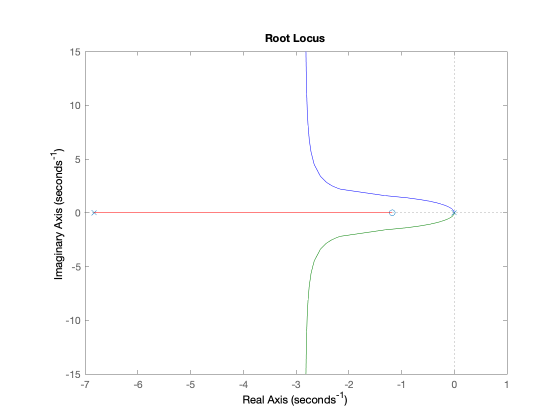

In [15]:
D = zpk(z0,p0,1);
Go=D*GH;
rlocus(Go)

In [16]:
Kc = rlocfind(Go,s1)

Kc =
   19.3137


Finally, let us calculate the step response and compare it with the result
achieved with velocity feedback

$$G_1(s) = \frac{8}{s^2 + 4s + 8}$$

and proportional + derivative compensation

$$G_2(s) = \frac{4(s+2)}{s^2 + 4s + 8}$$

In [17]:
G1 = tf(8,[1, 4, 8]);
G2 = tf(4*[1, 2],[1, 4, 8]);
G3 = feedback(Kc*D*G,H)


G3 =
 
      19.314 (s+1.172)
  ------------------------
  (s+2.828) (s^2 + 4s + 8)
 
Continuous-time zero/pole/gain model.



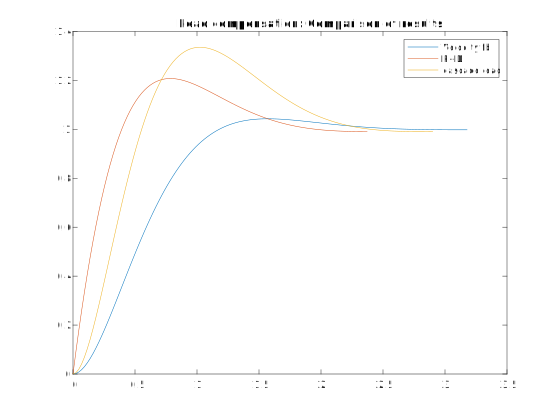

In [18]:
[y1,t1]=step(G1);
[y2,t2]=step(G2);
[y3,t3]=step(G3);
plot(t1,y1,t2,y2,t3,y3),legend('Velocity fb','P+D','cascade lead'),title('Lead compensation: Comparison of results')

When evaluating the third design you should take into account the location of the compensator zero and the third closed-loop pole (at $s = -2.828$) relative to the desired closed-loop pole at $s_1$.

## Method 3

The third method referenced in D'Azzo and Houpis addresses a problem with lead compensator design that has so far not been addressed. That is that only the desired transient performance, and hence the desired location of the dominant closed-loop poles, is considered. The desired system gain is not specified. A method of achieving both gain and desired pole location has been proposed by Phillips and Harbour (1988) and is considered in the [Analytic Root Locus Design](../5/analrloc) section (**not assessed**).

## References

John J. D'Azzo and Constantne Houpis, (1975) *Linear Control System Analysis and Design (Conventional and Modern)*, McGraw & Hill, 1975 and later editions.

Phillips and Harbor (1988), *Feedback Control Systems*, Prentice Hall.

## Resources

An executable version of this document is available to download as a MATLAB Live Script file [cclead.mlx](matlab/cclead.mlx).

The Simulink model which compares the results of the satellite attitude control system compensated with velocity feedback, P+D compensation *and* lead compensation is [lead_compensation.slx](matlab/lead_compensation.slx).